In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Step 1: Load the Data
​
Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.

In [2]:
# Path of the file to read
candy_filepath = "/content/drive/MyDrive/github_repos/data_analysis/data_visualization/datasets/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

## Step 2: Review the data

Use a Python command to print the first five rows of the data.

In [3]:
# Print the first five rows of the data
candy_data.head() # Your code here

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar.
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.


## Step 3: The role of sugar

Do people tend to prefer candies with higher sugar content?  

#### Part A

Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

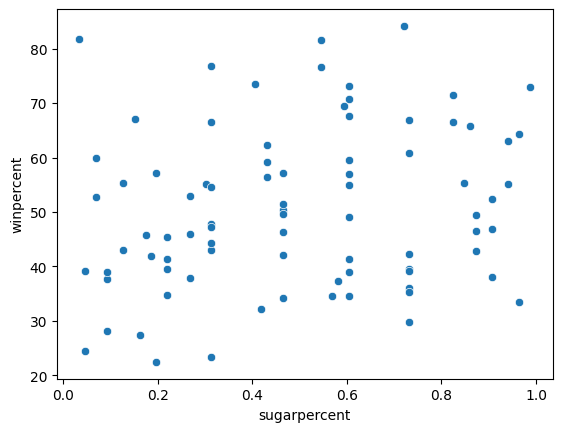

In [5]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

**Solution**: The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

## Step 4: Take a closer look
​
#### Part A
​
Create the same scatter plot you created in **Step 3**, but now with a regression line!

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

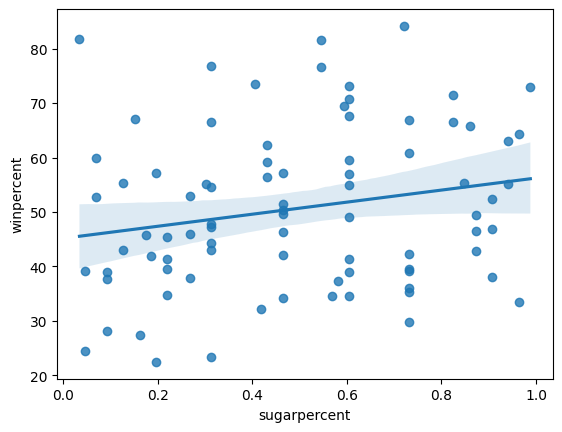

In [6]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

**Solution**: Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between 'winpercent' and 'sugarpercent'. Thus, people have a slight preference for candies containing relatively more sugar.

## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_

<Axes: xlabel='pricepercent', ylabel='winpercent'>

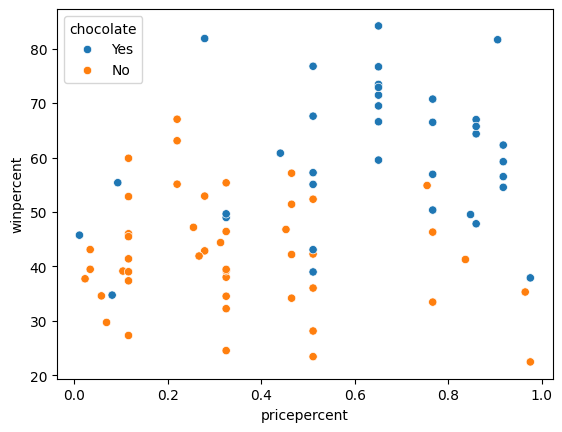

In [7]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!

## Step 6: Investigate chocolate

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

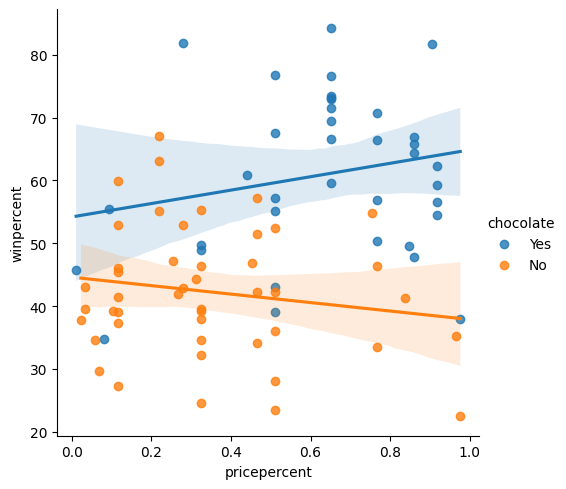

In [8]:
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

**Solution**: We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.

## Step 7: Everybody loves chocolate.

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

<Axes: xlabel='chocolate', ylabel='winpercent'>

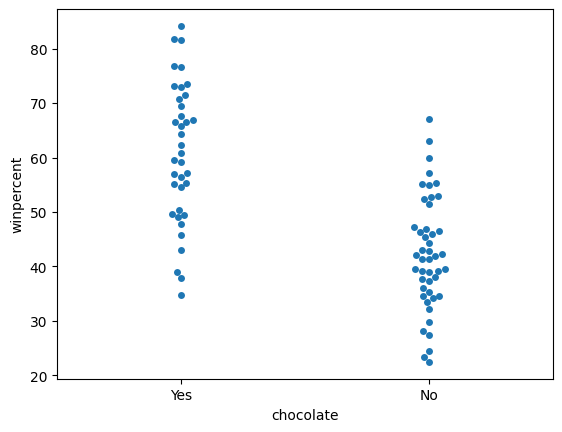

In [9]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])

#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?

**Solution**: In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, the plot from Step 6 conveys far more information that could distract from the main point.